In [1]:
# Writed By Mostafa Hassani
# Version 1

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from bidi.algorithm import get_display
#from arabic_reshaper import reshape

import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-hr/HR.csv


In [2]:
DF_HR  = pd.read_csv("/kaggle/input/dataset-hr/HR.csv")

In [3]:
DF_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
DF_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
DF_HR.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
Columns = DF_HR.columns
for Col in Columns:
    Uniques = DF_HR[Col].unique()
    print("Uniques Data Of {} is : ".format(Col))
    print(np.sort(Uniques))
    print()    

Uniques Data Of satisfaction_level is : 
[0.09 0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22
 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]

Uniques Data Of last_evaluation is : 
[0.36 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49
 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]

Uniques Data Of number_project is : 
[2 3 4 5 6 7]

Uniques Data Of average_montly_hours is : 
[ 96  97  98  99 100 101 1

<AxesSubplot:ylabel='salary'>

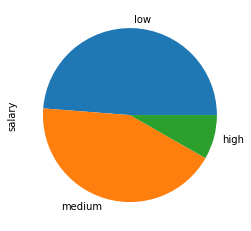

In [7]:
pd.value_counts(DF_HR['salary']).plot.pie()

In [8]:
def Bar_Lable(plot,N_Fraction):
    for p in plot.patches:
        plot.annotate(format(p.get_height(), N_Fraction), 
                      (p.get_x() + p.get_width() / 2, p.get_height()+(p.get_height()/50)),
                      ha='center', va='center')

# **Number of people hired based on salary level**

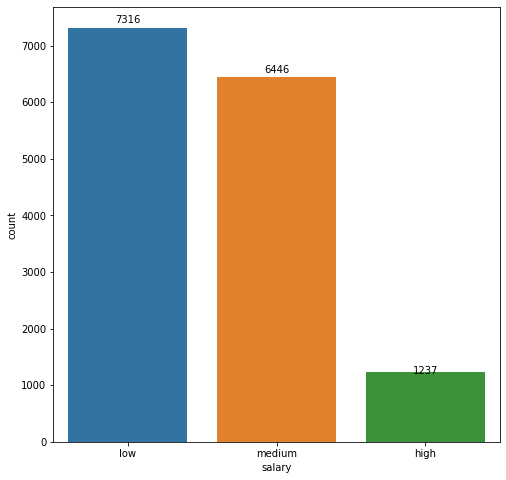

In [9]:
plt.figure(figsize=(8, 8))
Plot = sns.countplot(x='salary', data=DF_HR)
Bar_Lable(Plot,'.0f')

# **Number of people employed in each department**

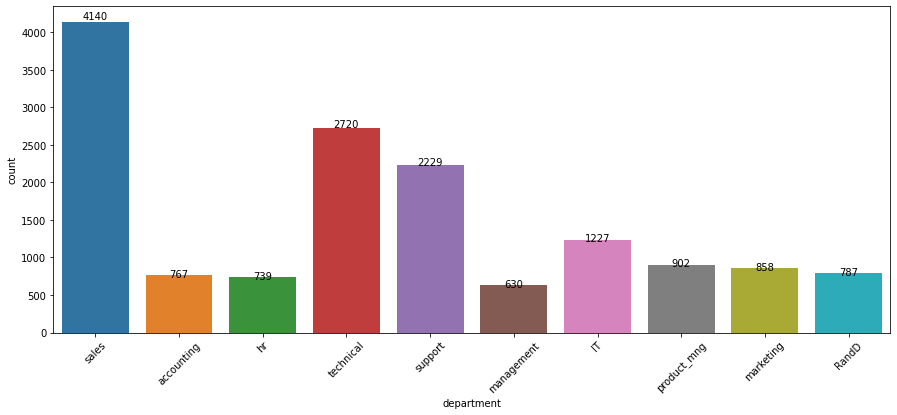

In [10]:
plt.figure(figsize=(15, 6))
Plot = sns.countplot(x='department', data=DF_HR)
Plot.set_xticklabels(Plot.get_xticklabels(), rotation=45)
Bar_Lable(Plot,'.0f')

# **Number of people hired based on salary level and type of department**

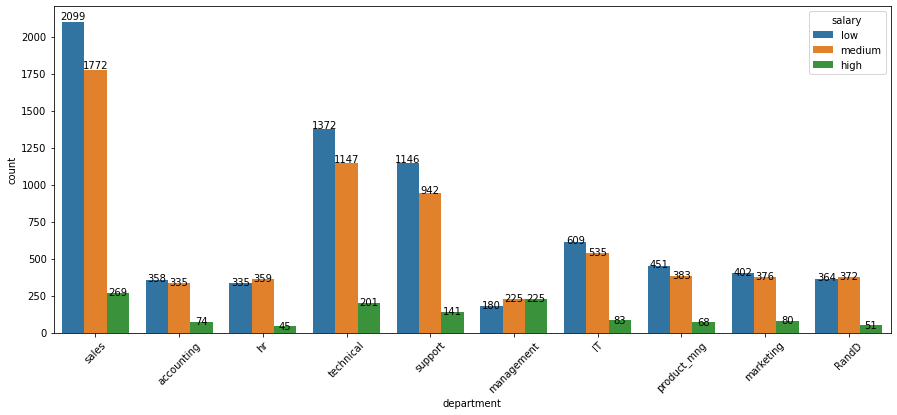

In [11]:
plt.figure(figsize=(15, 6))
Plot = sns.countplot(x='department', data=DF_HR, hue='salary')
Plot.set_xticklabels(Plot.get_xticklabels(), rotation=45)
Bar_Lable(Plot,'.0f')

# *Maximum number of projects that personnel who have resigned did, based on satisfaction level*

In [12]:
DF_HR[DF_HR['left']==0].sort_values(["number_project","satisfaction_level"],ascending=False).head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
4553,1.00,0.76,6,246,3,1,0,1,support,medium
8411,1.00,0.61,6,270,3,0,0,0,sales,low
10878,1.00,0.88,6,201,4,0,0,0,technical,low
13089,1.00,0.88,6,201,4,0,0,0,technical,low
2292,0.99,0.75,6,139,5,1,0,0,technical,medium
2920,0.99,0.39,6,214,5,1,0,0,sales,low
4691,0.99,0.44,6,104,6,0,0,0,technical,low
4770,0.99,0.56,6,128,4,0,0,0,technical,medium
5650,0.99,0.82,6,185,4,1,0,0,sales,high
10371,0.99,0.37,6,219,6,0,0,0,product_mng,low


# *The latest status of the evaluation of personnel who did not suffer a decline in the company in a downward direction*

0.36 ==> 1.0
       last_evaluation
11862              1.0
4455               1.0
11139              1.0
9586               1.0
8320               1.0
3894               1.0
11118              1.0
14073              1.0
9625               1.0
6253               1.0
13387              1.0
3917               1.0
7862               1.0
10472              1.0
4450               1.0


<AxesSubplot:>

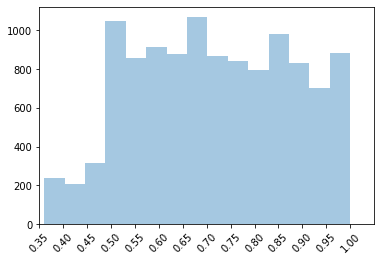

In [13]:
Last_Evaluation = DF_HR['last_evaluation'][DF_HR['left']==0].sort_values(ascending=False)
DF_LE = pd.DataFrame(Last_Evaluation,columns=['last_evaluation'])
print(Last_Evaluation.min(),"==>",Last_Evaluation.max())
print(DF_LE.head(15))
plt.xlim(0.35,1.05)
plt.xticks(np.arange(0.35, 1.05, step=0.05),rotation=45)
sns.distplot(DF_LE, hist=True, kde=False,bins=15, rug=False )

# *The most influential component on the problem target based on correlation detection*

left                     1.000000
satisfaction_level       0.388375
Work_accident            0.154622
time_spend_company       0.144822
average_montly_hours     0.071287
promotion_last_5years    0.061788
number_project           0.023787
last_evaluation          0.006567
dtype: float64


<AxesSubplot:>

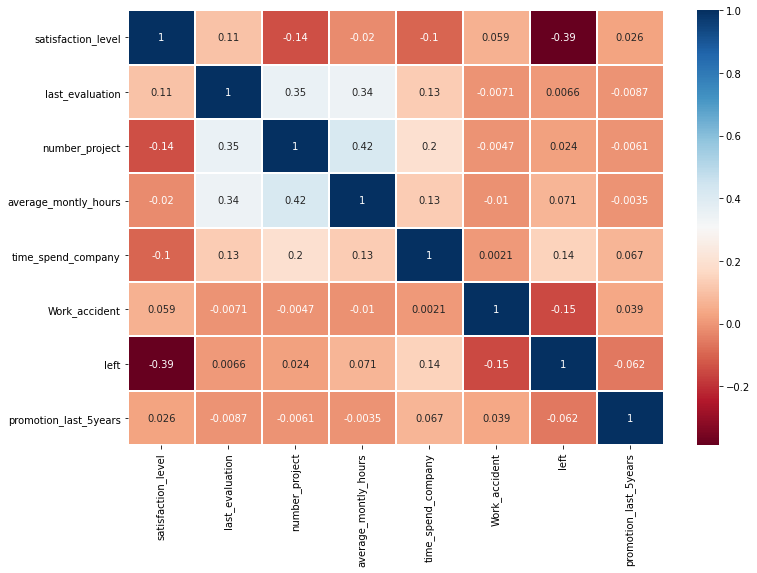

In [14]:
Cor = np.abs(DF_HR.corrwith(DF_HR['left']))
print(Cor.sort_values(ascending=False))

plt.figure(figsize=(12,8))
sns.heatmap(DF_HR.corr(),annot=True,linewidths=0.1,cmap="RdBu")

# *Analysis of staff drop chart based on the type of department and the average time spent in the organization*

<AxesSubplot:xlabel='department', ylabel='time_spend_company'>

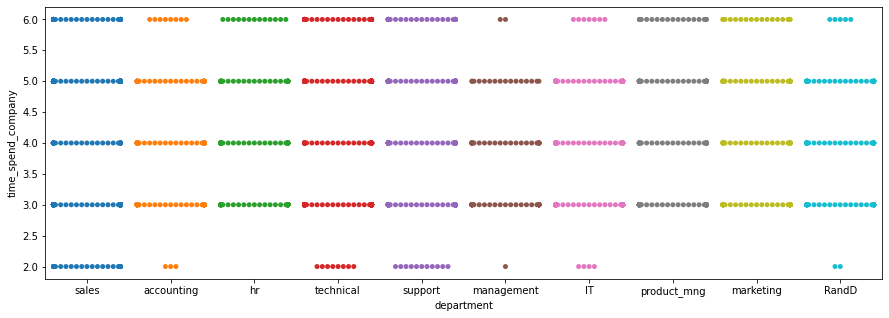

In [15]:
plt.figure(figsize=(15,5))
Data_Left = DF_HR[DF_HR['left']==1]
sns.swarmplot(x='department', y='time_spend_company' ,data=Data_Left)

# *Box plot of all departments in terms of loss of personnel, and the average time spent in the organization in a frame*

<AxesSubplot:xlabel='department', ylabel='time_spend_company'>

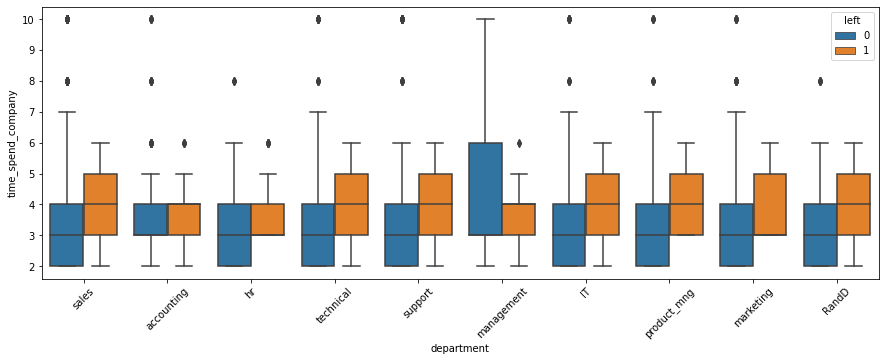

In [16]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(x='department', y='time_spend_company', data=DF_HR, hue='left')

# *Comparison of distribution and box chart of loyal personnel of the organization based on the latest evaluation status of the organization's people in one frame*

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

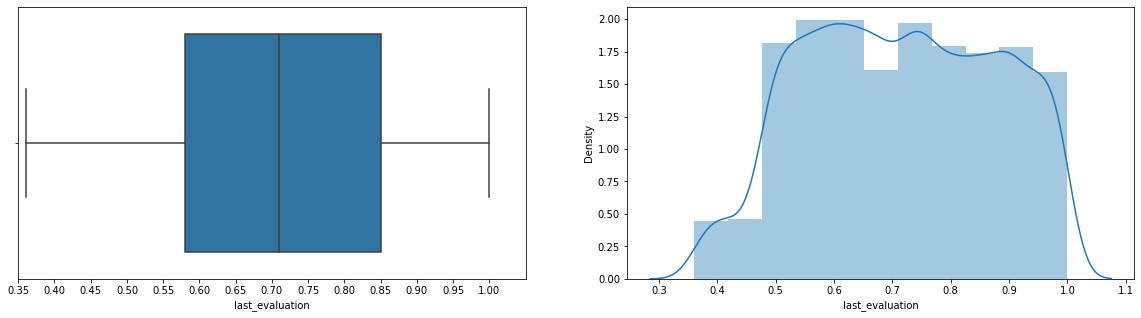

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='last_evaluation', data=DF_HR[DF_HR['left']==0])
plt.xlim(0.35,1.05)
plt.xticks(np.arange(0.35, 1.05, step=0.05))
plt.subplot(1,2,2)
sns.distplot(DF_HR['last_evaluation'][DF_HR['left']==0],bins=11)

# *Compare the histogram of the latest evaluation status of personnel who have suffered a loss and personnel who will be active in the company in one format*

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

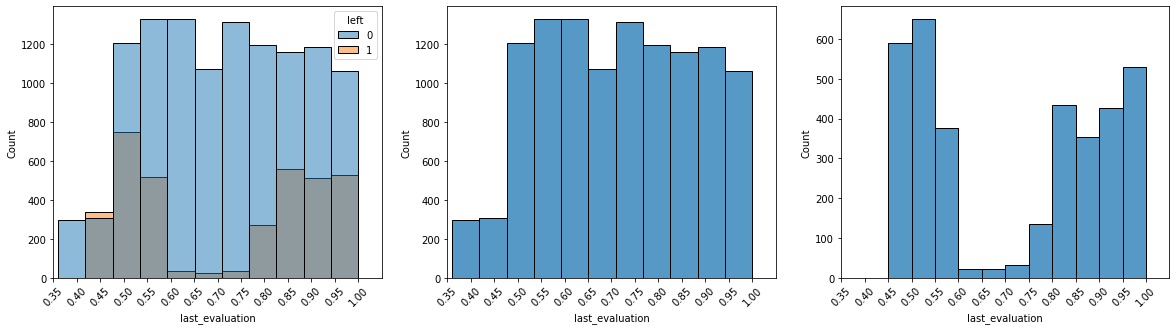

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xlim(0.35,1.05)
plt.xticks(np.arange(0.35, 1.05, step=0.05),rotation=45)
sns.histplot(x='last_evaluation', data=DF_HR, hue='left',bins=11)
plt.subplot(1,3,2)
plt.xlim(0.35,1.05)
plt.xticks(np.arange(0.35, 1.05, step=0.05),rotation=45)
sns.histplot(x='last_evaluation', data=DF_HR[DF_HR['left']==0],bins=11)
plt.subplot(1,3,3)
plt.xlim(0.35,1.05)
plt.xticks(np.arange(0.35, 1.05, step=0.05),rotation=45)
sns.histplot(x='last_evaluation', data=DF_HR[DF_HR['left']==1],bins=11)

# *Comparison of satisfaction histogram of personnel  who have resigned and personnel who will be active in the company in one format*

<AxesSubplot:title={'center':'Personnel who have resigned'}, xlabel='satisfaction_level', ylabel='Count'>

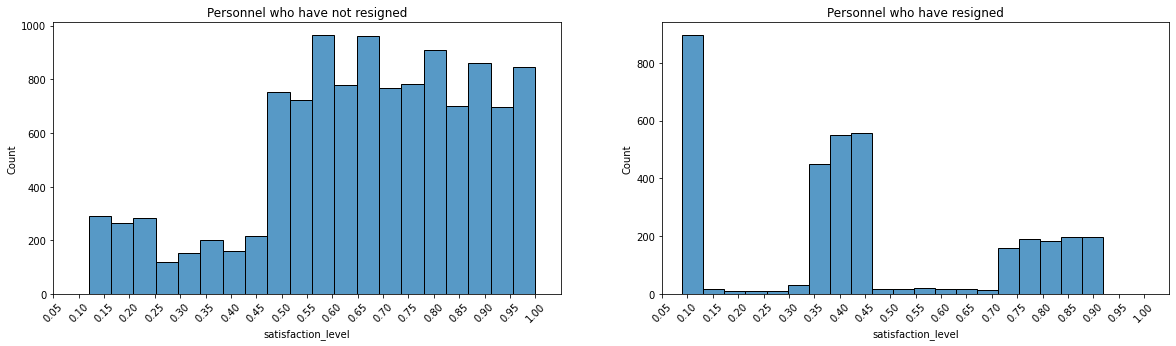

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlim(0.05,1.05)
plt.title("Personnel who have not resigned")
plt.xticks(np.arange(0.05, 1.05, step=0.05),rotation=45)
sns.histplot(x='satisfaction_level', data=DF_HR[DF_HR['left']==0], bins=20)
plt.subplot(1,2,2)
plt.xlim(0.05,1.05)
plt.title("Personnel who have resigned")
plt.xticks(np.arange(0.05, 1.05, step=0.05),rotation=45)
sns.histplot(x='satisfaction_level', data=DF_HR[DF_HR['left']==1], bins=20)

# *Graph the number of people working in each data department according to the amount of income (bar chart)*

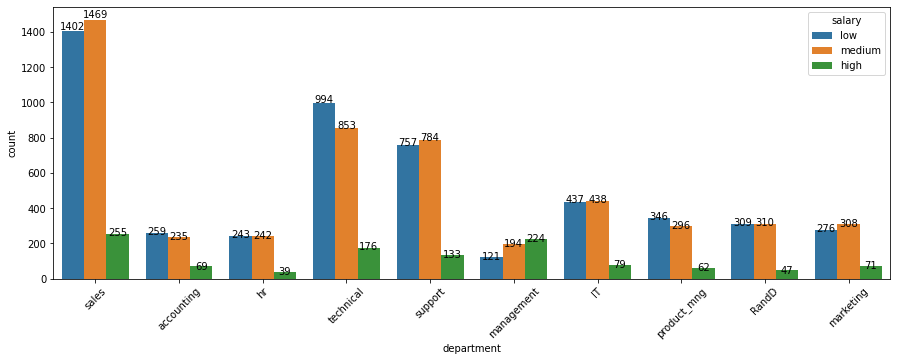

In [20]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
Plot = sns.countplot(x='department', data=DF_HR[DF_HR['left']==0],hue='salary')
Bar_Lable(Plot,'.0f')

# *Changing Categorical to numerical*

In [21]:
# salary_dict = {'low':0,'medium':1,'high':2}
# DF_HR['salary_num'] = DF_HR.salary.map(salary_dict)
# DF_HR.drop('salary', inplace=True, axis=1)
# DF_HR = DF_HR.rename(index=str, columns={'salary_num':'salary'})
DF_HR['salary'] = DF_HR['salary'].replace({'low':1, 'medium':2, 'high':3})
DF_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [22]:
Temp = pd.get_dummies(DF_HR['department'],drop_first=True)
DF_HR = pd.concat([DF_HR, Temp], axis=1)
DF_HR.drop(['department'],axis=1, inplace=True)
DF_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


# **Scaling**

In [23]:
from sklearn.preprocessing import MinMaxScaler
Features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
            'Work_accident','promotion_last_5years','salary']
Scaler = MinMaxScaler()
DF_HR[Features] = Scaler.fit_transform(DF_HR[Features])
DF_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,0.0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,0.5,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,0.5,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,0.0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,0.0,0,0,0,0,0,0,1,0,0


# **Train Test Split**

In [24]:
from sklearn.model_selection import train_test_split

X_DF_HR = DF_HR.drop('left', axis=1)
Y_DF_HR = DF_HR['left']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_DF_HR,Y_DF_HR,test_size=0.3, train_size=0.7, random_state=100,
                                                    shuffle=True, stratify=(Y_DF_HR))

<AxesSubplot:xlabel='left', ylabel='count'>

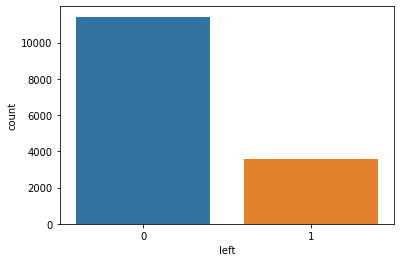

In [25]:
sns.countplot(DF_HR['left'])

# **Weighting**

In [26]:
from sklearn.utils import class_weight
Class_weights = class_weight.compute_class_weight('balanced', np.unique(Y_Train), Y_Train)
Class_weights = dict(zip(np.unique(Y_Train), class_weight.compute_class_weight('balanced', np.unique(Y_Train), Y_Train)))
Class_weights

{0: 0.6562695336917115, 1: 2.0998}

In [27]:
def Model(Kind):
    EXE_Model = Kind(class_weight=Class_weights)
    EXE_Model.fit(X_Train,Y_Train)
    Predicted_Model = EXE_Model.predict(X_Test)
    Acc_Test = accuracy_score(Predicted_Model,Y_Test)
    print('Accuracy on Train: {:.3f}'.format(EXE_Model.score(X_Train,Y_Train)))
    print('Accuracy on Test : {:.3f}'.format(Acc_Test))
    print(classification_report(Y_Test, Predicted_Model))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_Test, Predicted_Model))    

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics

Model(LogisticRegression)

Accuracy on Train: 0.757
Accuracy on Test : 0.758
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3429
           1       0.49      0.80      0.61      1071

    accuracy                           0.76      4500
   macro avg       0.71      0.77      0.72      4500
weighted avg       0.82      0.76      0.77      4500

Confusion Matrix:
[[2550  879]
 [ 210  861]]


In [29]:
from sklearn.ensemble import RandomForestClassifier

Model(RandomForestClassifier)

Accuracy on Train: 1.000
Accuracy on Test : 0.990
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Confusion Matrix:
[[3422    7]
 [  39 1032]]


In [30]:
from sklearn.svm import SVC

Model(SVC)

Accuracy on Train: 0.940
Accuracy on Test : 0.930
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3429
           1       0.81      0.92      0.86      1071

    accuracy                           0.93      4500
   macro avg       0.89      0.93      0.91      4500
weighted avg       0.94      0.93      0.93      4500

Confusion Matrix:
[[3206  223]
 [  90  981]]
